In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, classification_report

from evaluate_function import evaluate_model



url = 'https://raw.githubusercontent.com/esnt/Data/refs/heads/main/CleanData/SMSSpamCollection'
df =  pd.read_csv(url, sep='\t', names=['target', 'message'])

y = (df['target']=='spam').astype(int)
X = df['message']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
pattern = r'(?u)\b[^\W\d_]{2,}\b'
vec = CountVectorizer(binary=True, min_df=100, max_df=0.5, token_pattern=pattern)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)




In [28]:
y.mean()

0.13406317300789664

In [29]:
## Convert to dataframe if desired
# X_train_df = pd.DataFrame(X_train_preprocessed, columns=numeric_columns + list(preprocessor.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(non_numeric_columns)) + passthru_columns) 
# X_test_df = pd.DataFrame(X_test_preprocessed, columns=numeric_columns + list(preprocessor.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(non_numeric_columns)) + passthru_columns)   

## Fit Baseline Model

In [4]:
model_base = LogisticRegression(C=.001)
model_base.fit(X_train, y_train)


LogisticRegression(C=0.001)

Test Accuracy: 0.8658
Confusion Matrix:
[[1206    0]
 [ 187    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1206
           1       0.00      0.00      0.00       187

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393

ROC AUC: 0.9588
PR AUC: 0.8676


/Users/sneeley/miniconda3/envs/shared/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sneeley/miniconda3/envs/shared/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sneeley/miniconda3/envs/shared/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

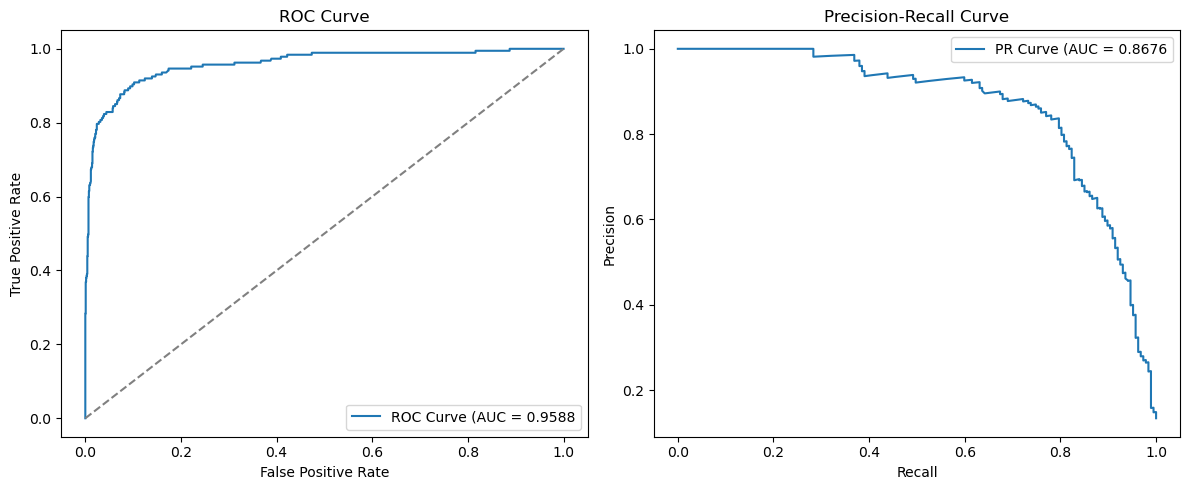

In [5]:
evaluate_model(model_base, X_test, y_test)

## SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
smote = SMOTE(random_state=35)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [8]:
model_smote = LogisticRegression(max_iter=1000, C=.001)
model_smote.fit(X_train_resampled, y_train_resampled)



LogisticRegression(C=0.001, max_iter=1000)

Test Accuracy: 0.8959
Confusion Matrix:
[[1087  119]
 [  26  161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1206
           1       0.57      0.86      0.69       187

    accuracy                           0.90      1393
   macro avg       0.78      0.88      0.81      1393
weighted avg       0.92      0.90      0.90      1393

ROC AUC: 0.9551
PR AUC: 0.8597


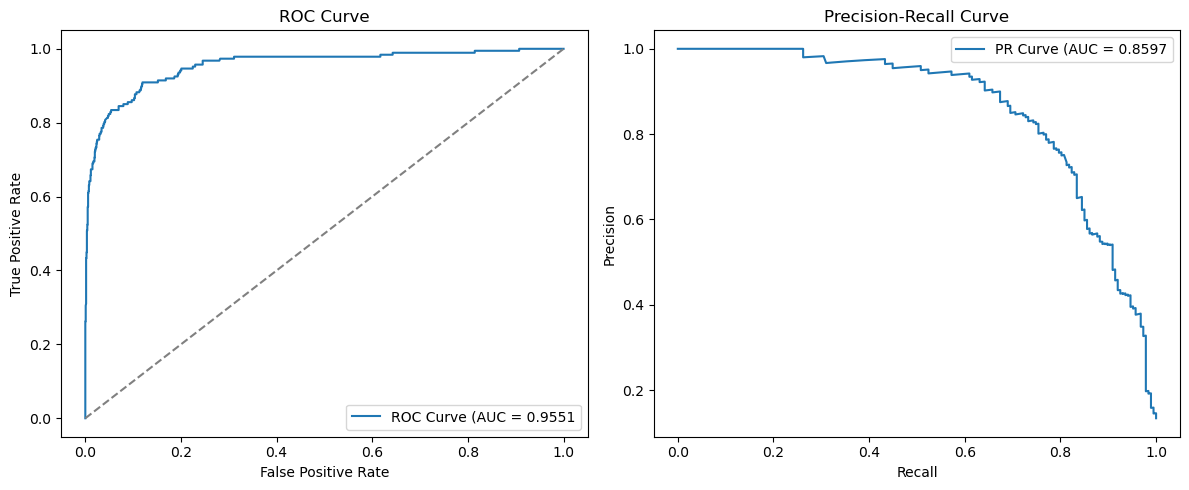

In [9]:
evaluate_model(model_smote, X_test, y_test)

## Undersampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

In [11]:
model_undersample = LogisticRegression(max_iter=1000, C=.001)
model_undersample.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=0.001, max_iter=1000)

Test Accuracy: 0.9131
Confusion Matrix:
[[1113   93]
 [  28  159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1206
           1       0.63      0.85      0.72       187

    accuracy                           0.91      1393
   macro avg       0.80      0.89      0.84      1393
weighted avg       0.93      0.91      0.92      1393

ROC AUC: 0.9571
PR AUC: 0.8620


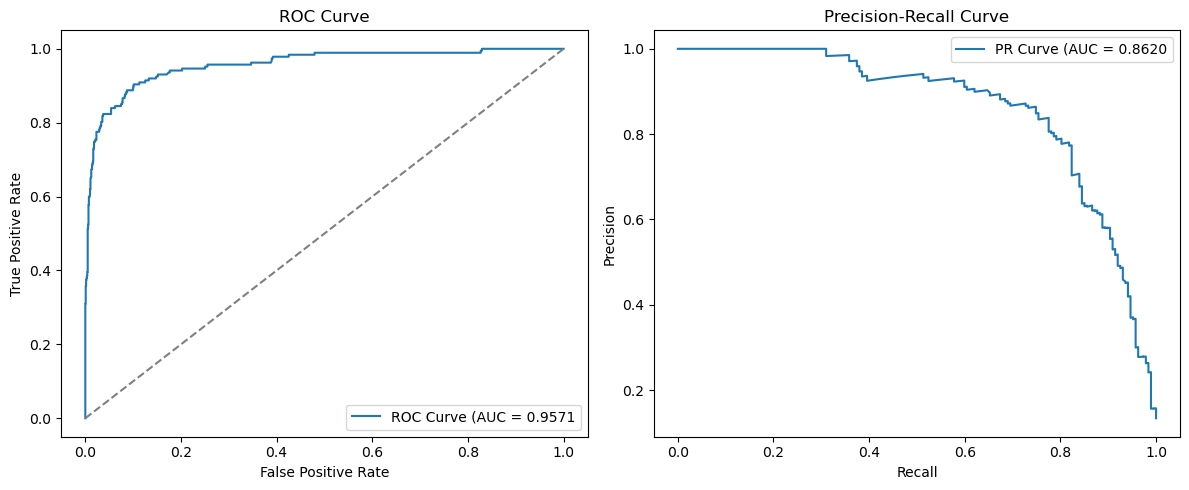

In [12]:
evaluate_model(model_undersample, X_test, y_test)

## Class-Weighted 

In [13]:
model_weighted = LogisticRegression(max_iter=1000, class_weight='balanced', C=.001)
model_weighted.fit(X_train, y_train)


LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000)

Test Accuracy: 0.9261
Confusion Matrix:
[[1129   77]
 [  26  161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1206
           1       0.68      0.86      0.76       187

    accuracy                           0.93      1393
   macro avg       0.83      0.90      0.86      1393
weighted avg       0.94      0.93      0.93      1393

ROC AUC: 0.9601
PR AUC: 0.8736


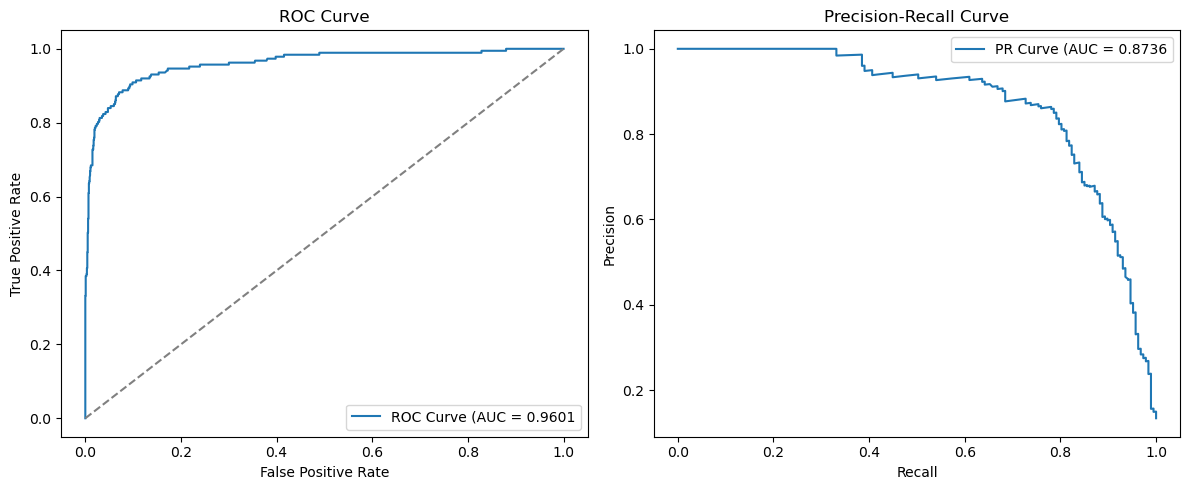

In [14]:
evaluate_model(model_weighted, X_test, y_test)

## Cost-Sensitive Learning

In [15]:
model_cs = LogisticRegression(max_iter=1000, class_weight={0:1, 1:100}, C=.001)
model_cs.fit(X_train, y_train)


LogisticRegression(C=0.001, class_weight={0: 1, 1: 100}, max_iter=1000)

Test Accuracy: 0.9261
Confusion Matrix:
[[1129   77]
 [  26  161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1206
           1       0.68      0.86      0.76       187

    accuracy                           0.93      1393
   macro avg       0.83      0.90      0.86      1393
weighted avg       0.94      0.93      0.93      1393

ROC AUC: 0.9601
PR AUC: 0.8736


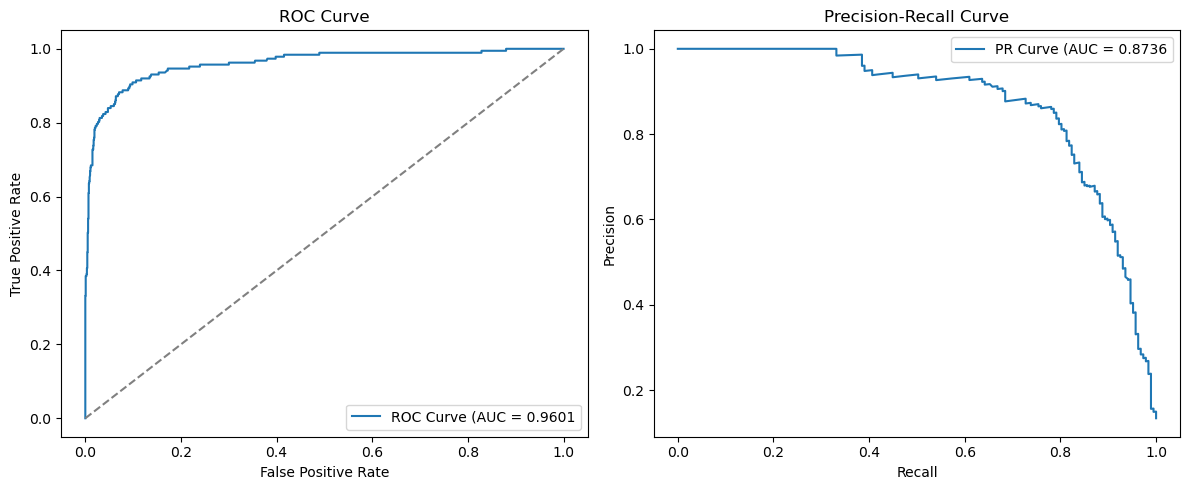

In [16]:
evaluate_model(model_weighted, X_test, y_test)

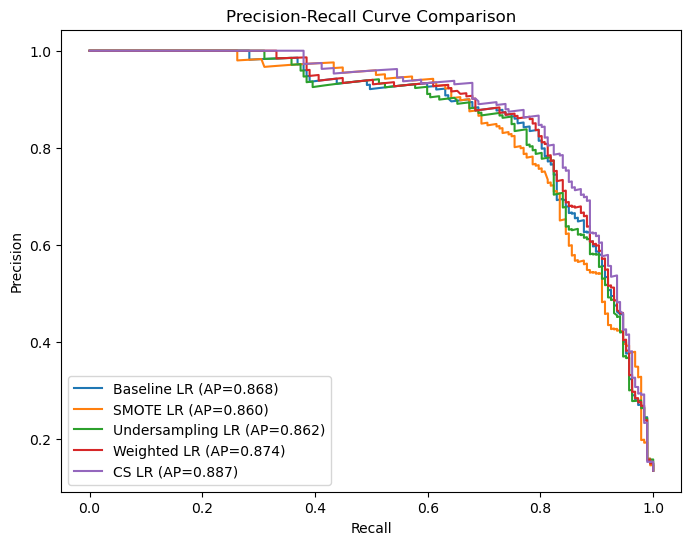

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

models = {
    "Baseline LR": model_base,
    "SMOTE LR": model_smote,
    "Undersampling LR": model_undersample,
    "Weighted LR": model_weighted,  # Use a model that supports class-weighting
    "CS LR": model_cs
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1]  # Get positive class probabilities
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, label=f"{name} (AP={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

## Threshold Tuning

In [39]:
y_prob = model_base.predict_proba(X_test)[:,1]

In [40]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")    

Optimal threshold: 0.9254671676077589


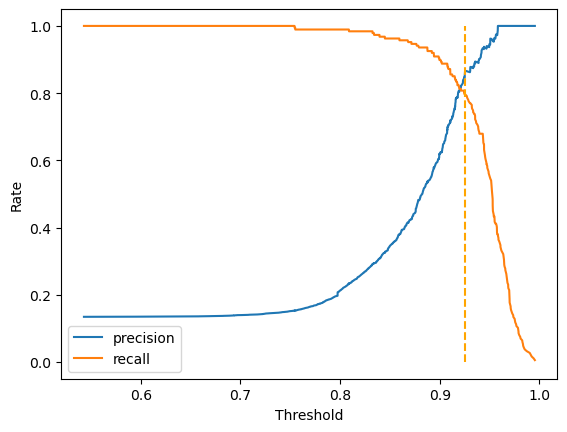

In [41]:
plt.plot(thresholds, precisions[:-1], label='precision')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.vlines(optimal_threshold, 0, 1, linestyle='--', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend();

In [42]:
print(classification_report(y_test, y_prob > optimal_threshold))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1206
           1       0.87      0.79      0.83       187

    accuracy                           0.96      1393
   macro avg       0.92      0.89      0.90      1393
weighted avg       0.95      0.96      0.95      1393



In [43]:
def cost_sensitive_threshold(model, X_test, y_test, C_FP=5, C_FN=10):
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    cost = (C_FP * (1 - precision)) + (C_FN * (1 - recall))
    optimal_threshold = thresholds[np.argmin(cost)]
    return optimal_threshold

In [44]:
cs_threshold = cost_sensitive_threshold(model_base, X_test, y_test, C_FP=2, C_FN=100)

In [45]:
print(classification_report(y_test, y_prob > cs_threshold))

              precision    recall  f1-score   support

           0       0.99      0.14      0.25      1206
           1       0.15      0.99      0.26       187

    accuracy                           0.26      1393
   macro avg       0.57      0.57      0.26      1393
weighted avg       0.88      0.26      0.25      1393



In [46]:
cs_threshold

0.7542690532084636